## 機械学習課題

### ワインデータにおけるquality列の値を他の特徴量から予測

In [101]:
# 各種ライブラリをインポート
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import KFold
import xgboost as xgb

In [14]:
# trainデータを読み込み
train = pd.read_csv('../input/wine_train.csv')

In [16]:
# testデータを読み込み
test = pd.read_csv('../input/wine_test.csv')

In [8]:
# trainデータの確認
train.head()

,type,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,W,5.8,0.180,0.37,1.1,0.036,31.0,96.0,0.98942,3.16,0.48,12.0,6
1,R,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.99240,3.57,0.85,13.0,7
2,R,7.4,0.610,0.01,2.0,0.074,13.0,38.0,0.99748,3.48,0.65,9.8,5
3,W,7.0,0.310,0.26,7.4,0.069,28.0,160.0,0.99540,3.13,0.46,9.8,6
4,W,7.9,0.350,0.36,1.6,0.038,11.0,124.0,0.99280,3.25,0.48,11.0,5


In [17]:
# testデータの確認
test.head()

,type,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,R,8.0,0.810,0.25,3.4,0.076,34.0,85.0,0.99668,3.19,0.42,9.2
1,R,7.3,0.590,0.26,2.0,0.080,17.0,104.0,0.99584,3.28,0.52,9.9
2,W,6.4,0.105,0.29,1.1,0.035,44.0,140.0,0.99142,3.17,0.55,10.7
3,W,5.8,0.200,0.16,1.4,0.042,44.0,99.0,0.98912,3.23,0.37,12.2
4,W,8.0,0.260,0.28,8.2,0.038,72.0,202.0,0.99566,3.12,0.56,10.0


#### 特徴量
type : ワイン種別  
fixed.acidity : 酸味  
volatile.acidity : 揮発酸(酢酸)  
citric.acid : クエン酸  
residual.sugar : 糖分  
chlorides : 塩化ナトリウム  
free sulfur dioxide : 亜硫酸  
total.sulfur.dioxide : 総亜硫酸  
density : 密度  
pH : pH  
sulphates : 硫酸  
alcohol : アルコール度数  
quality : ワインの質（trainデータのみ）

特徴量計：13  

In [11]:
## 基本統計量の確認
train.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,7.224968,0.341049,0.318244,5.443751,0.055974,30.447335,115.400127,0.994712,3.218765,0.532034,10.494155,5.823358
std,1.304770,0.165021,0.144244,4.773600,0.035296,17.818565,56.886823,0.003026,0.160566,0.149066,1.196213,0.875998
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992320,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,155.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.230000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [12]:
# カラムのデータ型および欠損値の確認
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
type                    5497 non-null object
fixed.acidity           5497 non-null float64
volatile.acidity        5497 non-null float64
citric.acid             5497 non-null float64
residual.sugar          5497 non-null float64
chlorides               5497 non-null float64
free.sulfur.dioxide     5497 non-null float64
total.sulfur.dioxide    5497 non-null float64
density                 5497 non-null float64
pH                      5497 non-null float64
sulphates               5497 non-null float64
alcohol                 5497 non-null float64
quality                 5497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


In [71]:
# データを扱いやすくするためtypeの値をint64に変換する
# 0: 白ワイン　1:赤ワイン

"""
前処理を行うにあたり、可用性、再利用性、理解性を担保しつつ、
次回以降も使えるようにするため関数化することを心がけています。
"""

def wine_type(dataset):
    for data in dataset["type"]:
        if str(data) == "W":
            type.append(0)
        else:
            type.append(1)

In [74]:
# train.typeを変換
type = []
wine_type(train)
train["type"] = type

In [92]:
# train.typeが変換されていることを確認
train["type"]

0       0
1       1
2       1
3       0
4       0
5       0
6       1
7       0
8       1
9       1
10      0
11      0
12      0
13      0
14      0
15      1
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      0
25      0
26      0
27      1
28      0
29      0
       ..
5467    1
5468    0
5469    1
5470    0
5471    0
5472    0
5473    0
5474    1
5475    0
5476    1
5477    0
5478    1
5479    0
5480    0
5481    0
5482    1
5483    0
5484    0
5485    0
5486    0
5487    1
5488    1
5489    0
5490    0
5491    0
5492    0
5493    0
5494    1
5495    0
5496    0
Name: type, Length: 5497, dtype: int64

In [76]:
# test.typeを変換
type = []
wine_type(test)
test["type"] = type

In [93]:
# test.typeが変換されていることを確認
test["type"]

0      1
1      1
2      0
3      0
4      0
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     1
19     0
20     1
21     0
22     0
23     0
24     0
25     0
26     1
27     0
28     0
29     0
      ..
970    1
971    0
972    0
973    0
974    0
975    0
976    1
977    0
978    1
979    0
980    0
981    0
982    0
983    0
984    1
985    0
986    0
987    1
988    0
989    0
990    0
991    1
992    0
993    1
994    0
995    0
996    0
997    0
998    0
999    0
Name: type, Length: 1000, dtype: int64

In [78]:
# 変換後のデータ型を確認
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
type                    5497 non-null int64
fixed.acidity           5497 non-null float64
volatile.acidity        5497 non-null float64
citric.acid             5497 non-null float64
residual.sugar          5497 non-null float64
chlorides               5497 non-null float64
free.sulfur.dioxide     5497 non-null float64
total.sulfur.dioxide    5497 non-null float64
density                 5497 non-null float64
pH                      5497 non-null float64
sulphates               5497 non-null float64
alcohol                 5497 non-null float64
quality                 5497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 558.4 KB


### データの可視化

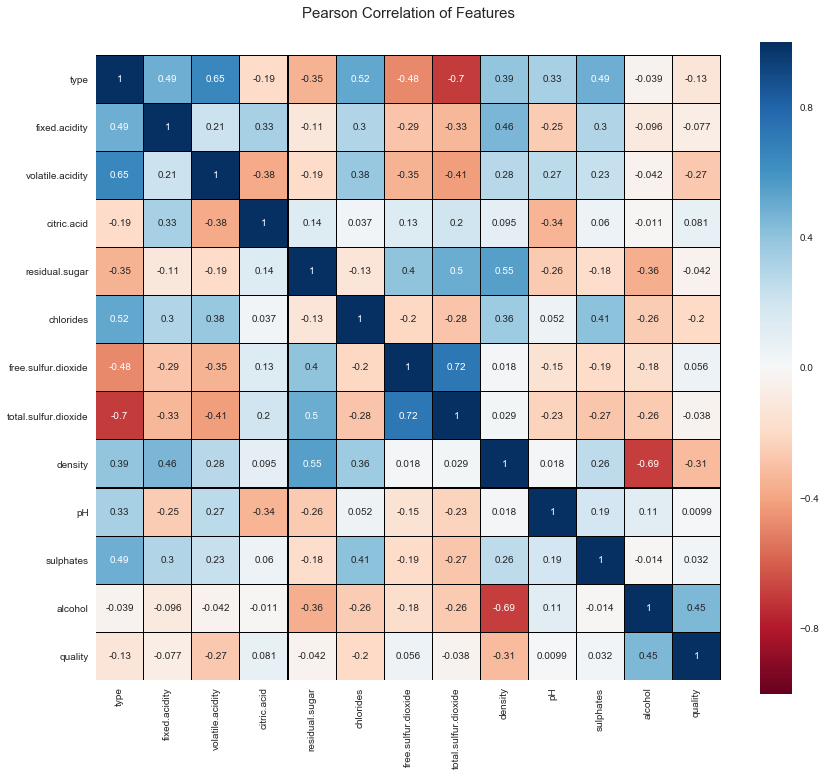

In [79]:
# 特徴量同士の相関係数を確認
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='black', annot=True)

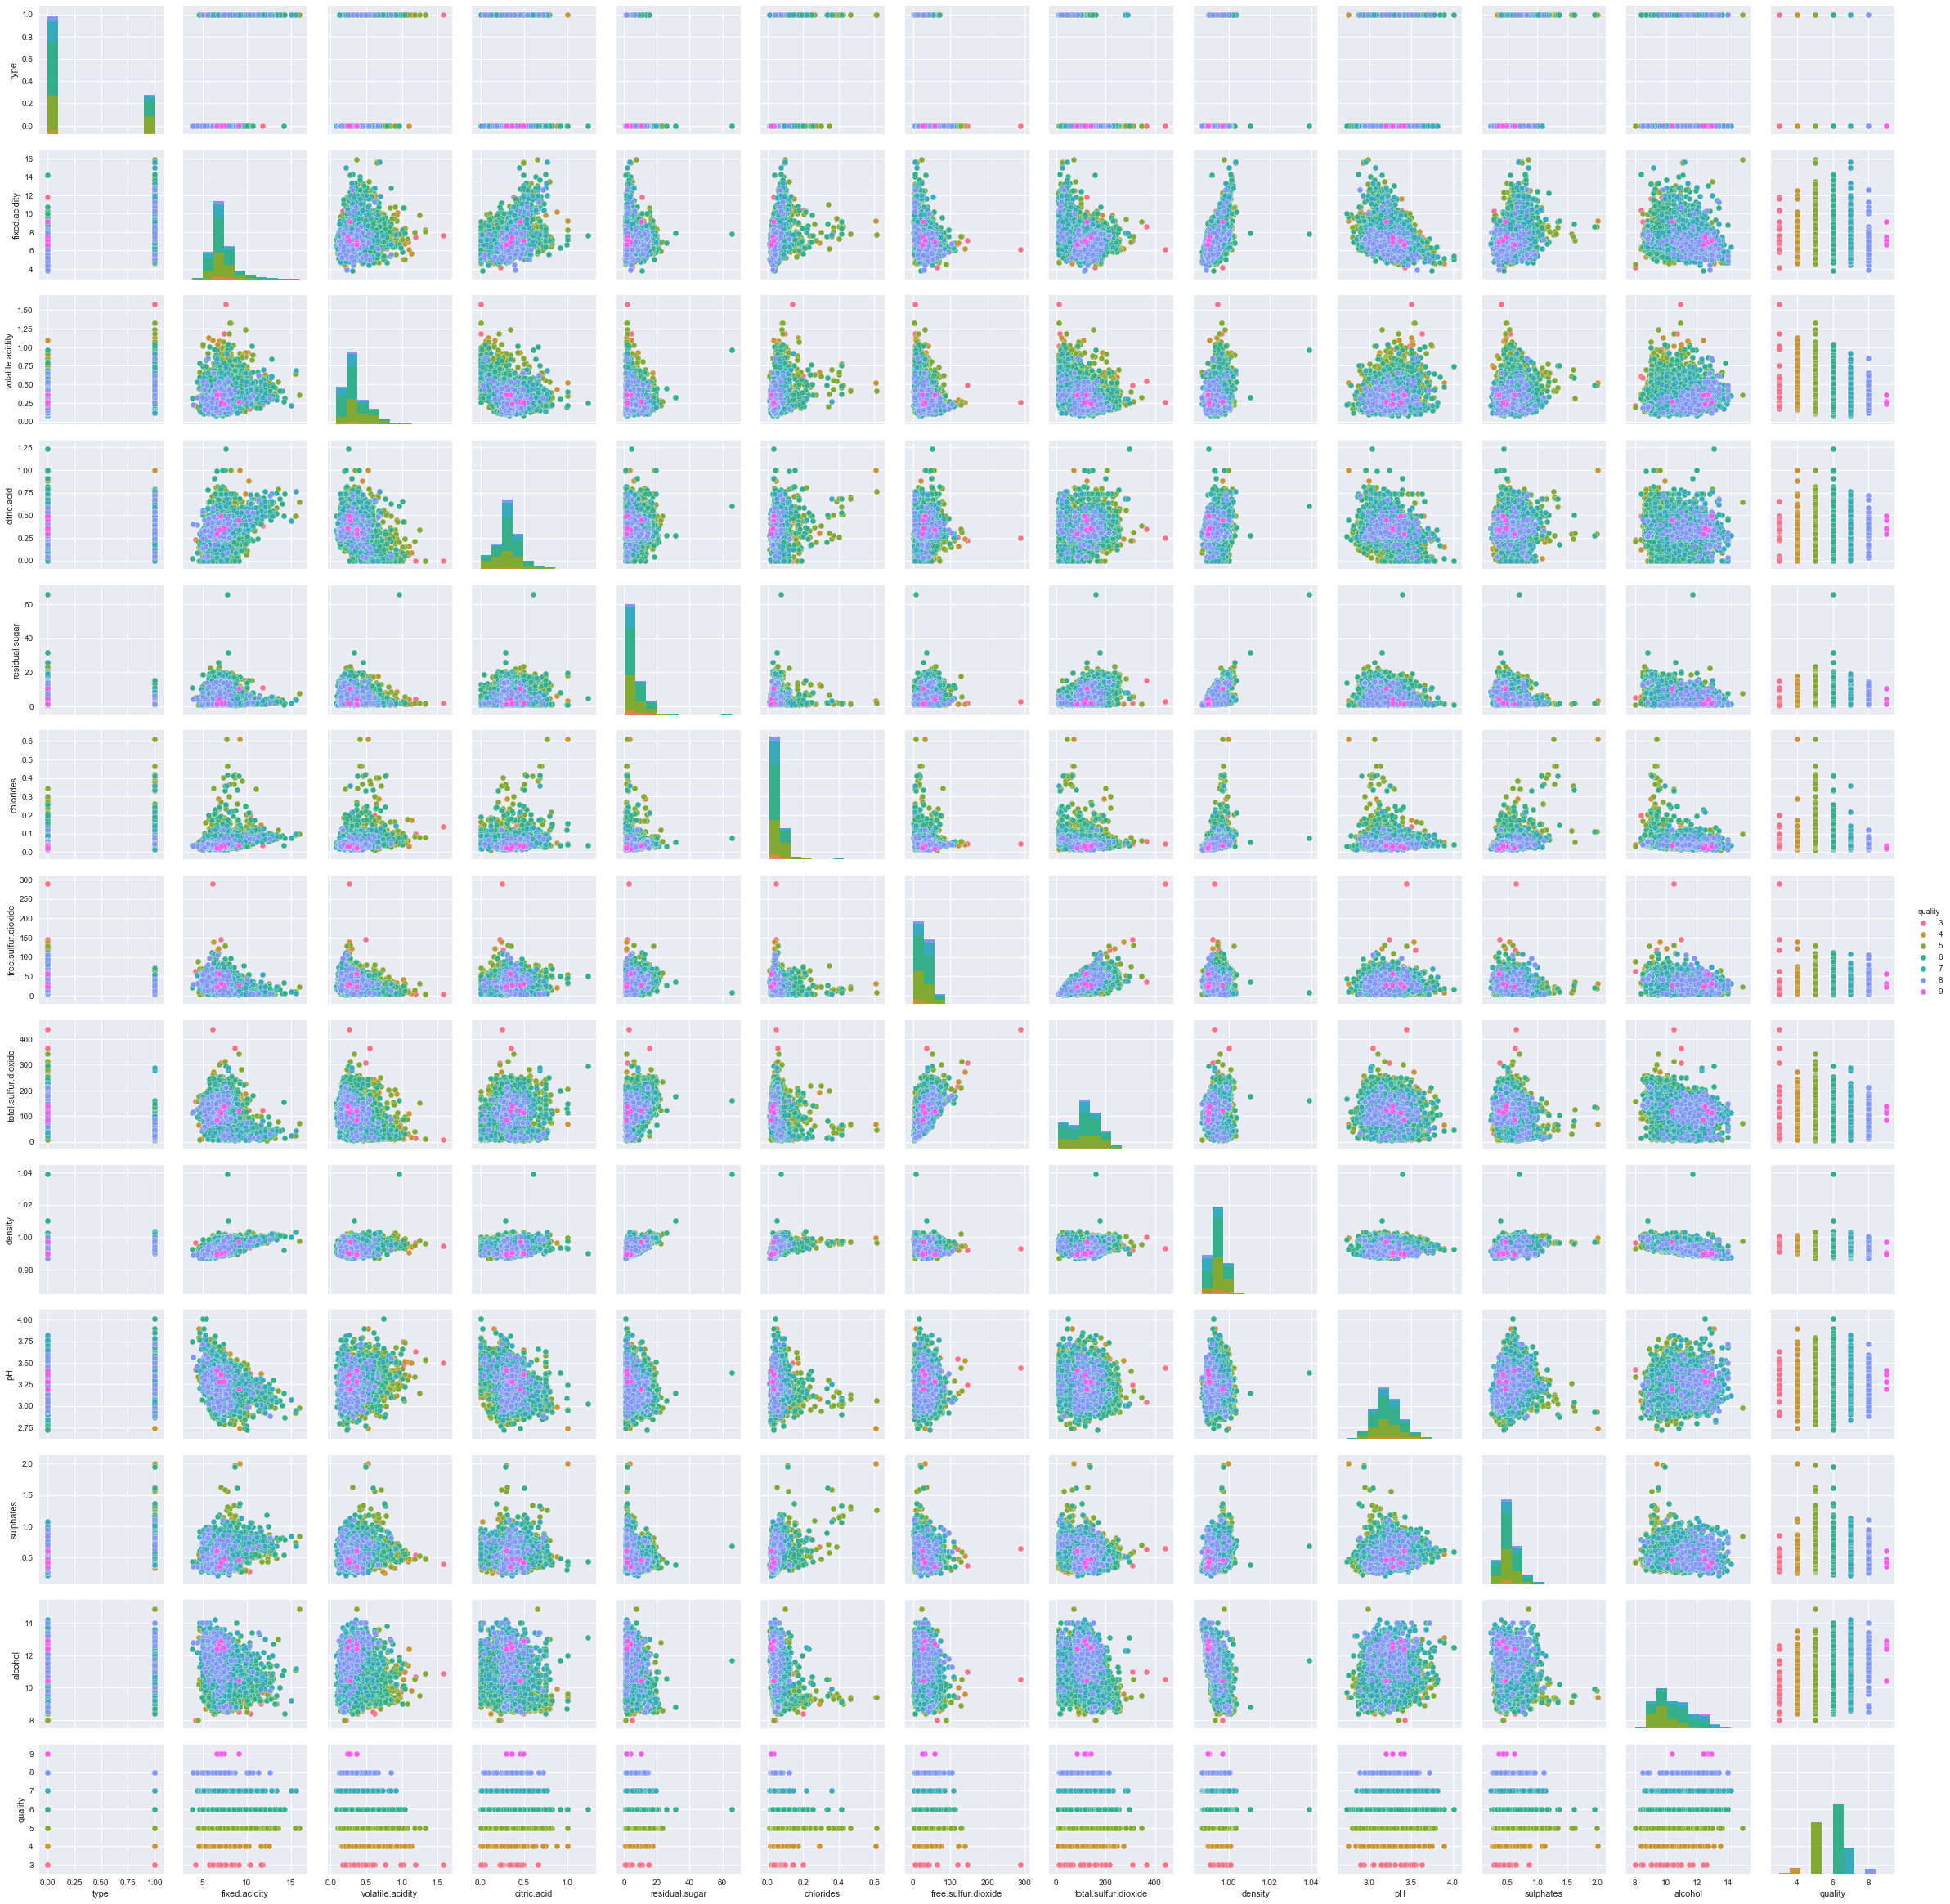

In [100]:
# qualityを軸に相関性をグラフ化
sns.pairplot(train, hue="quality")

In [94]:
# qualityの値分布を確認
# 最大値 9 最小値 3

quality_3 = 0
quality_4 = 0
quality_5 = 0
quality_6 = 0
quality_7 = 0
quality_8 = 0
quality_9 = 0

for quality in train["quality"]:
    if quality == 3:
        quality_3 += 1
    elif quality == 4 :
        quality_4 += 1
    elif quality == 5 :
        quality_5 += 1
    elif quality == 6 :
        quality_6 += 1
    elif quality == 7 :
        quality_7 += 1
    elif quality == 8 :
        quality_8 += 1
    elif quality == 9 :
        quality_9 += 1

print("################################")
print("qualityの値ごとにカウント")        
print("################################")
print("quality_3：" + str(quality_3))
print("quality_4：" + str(quality_4))
print("quality_5：" + str(quality_5))
print("quality_6：" + str(quality_6))
print("quality_7：" + str(quality_7))
print("quality_8：" + str(quality_8))
print("quality_9：" + str(quality_9))

################################
qualityの値ごとにカウント
################################
quality_3：25
quality_4：184
quality_5：1793
quality_6：2410
quality_7：910
quality_8：170
quality_9：5


### 学習モデル

In [103]:
# 学習モデルのハイパーパラメータを設定する際に使用するための変数準備
ptrain = train.shape[0] # p : parameter
ptest = test.shape[0]
SEED = 0
NFOLDS = 5
kf = KFold(ptrain, n_folds=NFOLDS, random_state=SEED)

In [ ]:
# 機械学習のライブラリの拡張性を高めるためのクラス
class Model_interface(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)
        
    def train